# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ../python

The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [2]:
from unityagents import UnityEnvironment
import numpy as np
import torch
import random
from collections import deque

env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [5]:
for i in range(5):                                         # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291


When finished, you can close the environment.

In [6]:
from ddpg_agent52 import Agent

agent = Agent(state_size=state_size, action_size=action_size, random_seed=200, agent_size=num_agents)

In [7]:
# Train the Agent

def ddpg(n_episodes=3000, max_t=1000, print_every=100):
    """Deep Deterministic Policy Gradients DDPG  from Pendulum exercise was employed: 
       Params:
            n_episodes (int): maximum number of training episodes
            max_t (int): maximum number of timesteps per episode
            print_every(int): print update 
    """
    scores_deque = deque(maxlen=print_every)
    MeanScores=[]
    scores = [] # list containing scores from each episode
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        states = env_info.vector_observations # get the current state
        agent.reset() #initialize agents 
        scores_a1 = 0 
        scores_a2 = 0
        score = 0
        for t in range(max_t):
            actions=[] # clear actions
            actions = agent.act(states) # select an action   
            action_info = env.step(actions)[brain_name] # get enviroment info
            next_states = action_info.vector_observations # get next state (for each agent)
            rewards = action_info.rewards # get reward (for each agent)
            dones = action_info.local_done # see if episode finished
            agent.save_experience(states[0], actions[0], rewards[0], next_states[0], dones[0])
            agent.save_experience(states[1], actions[1], rewards[1], next_states[1], dones[1])
            agent.learning(t) 
            states = next_states # roll over states to next time step
            score += max(rewards)

            if np.any(dones):
                break 
 
        scores_deque.append(np.mean(score))
        scores.append(np.mean(score))         # save most recent score

        if i_episode % 20 == 0:
            print('\rEpisode {}, Average last 100 scores: {:.3f}, Standard Deviation of last 100 scores: {:.3f}'\
                .format(i_episode, np.mean(scores_deque), np.std(scores_deque), end="\n")) 
        
        if  np.mean(scores_deque) > 0.5:
            print("Success   Episode:{},  Score:{:.3f}".format(i_episode,  np.mean(scores_deque)))
                torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
                torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth') 
                
            break
        

    return scores

scores = ddpg()



Episode 20, Average last 100 scores: 0.010, Standard Deviation of last 100 scores: 0.030
Episode 40, Average last 100 scores: 0.013, Standard Deviation of last 100 scores: 0.033
Episode 60, Average last 100 scores: 0.013, Standard Deviation of last 100 scores: 0.034
Episode 80, Average last 100 scores: 0.010, Standard Deviation of last 100 scores: 0.030
Episode 100, Average last 100 scores: 0.008, Standard Deviation of last 100 scores: 0.027
Episode 120, Average last 100 scores: 0.006, Standard Deviation of last 100 scores: 0.024
Episode 140, Average last 100 scores: 0.003, Standard Deviation of last 100 scores: 0.017
Episode 160, Average last 100 scores: 0.000, Standard Deviation of last 100 scores: 0.000
Episode 180, Average last 100 scores: 0.000, Standard Deviation of last 100 scores: 0.000
Episode 200, Average last 100 scores: 0.002, Standard Deviation of last 100 scores: 0.014
Episode 220, Average last 100 scores: 0.002, Standard Deviation of last 100 scores: 0.014
Episode 240, A

  Running setup.py bdist_wheel for pyvirtualdisplay ... done
  Stored in directory: /root/.cache/pip/wheels/d1/8c/16/1c64227974ae29c687e4cc30fd691d5c0fd40f54446dde99da
  Running setup.py bdist_wheel for EasyProcess ... done
  Stored in directory: /root/.cache/pip/wheels/b4/c6/e3/c163b04029d8fccfd54b809802640c1af587a01be8d7a04e1a
Successfully built pyvirtualdisplay EasyProcess
You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


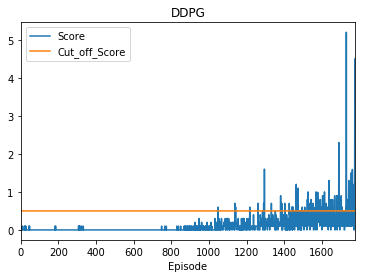

In [8]:
import os
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

!python -m pip install pyvirtualdisplay
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

is_ipython = 'inline' in plt.get_backend()
if is_ipython:
    from IPython import display
import pandas as pd
# plot the scores




fig = plt.figure()
DDPG=pd.DataFrame()
DDPG['Episode']=np.arange(len(scores))
DDPG['Score']=scores
DDPG['Cut_off_Score']=0.5
DDPG.plot(x="Episode", y=["Score", "Cut_off_Score"])

plt.title('DDPG')
plt.show()


In [9]:
torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth') 

  Cloning https://github.com/szagoruyko/pytorchviz to /tmp/pip-5cwh6414-build
  Running setup.py install for pytorchviz ... done
You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


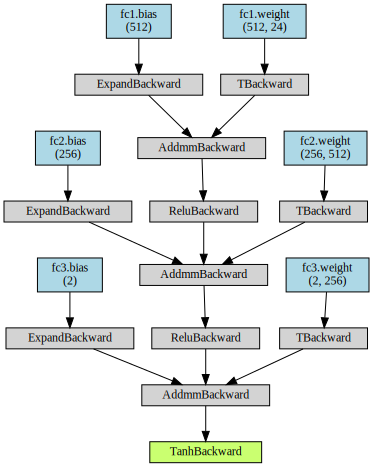

In [1]:
!pip install git+https://github.com/szagoruyko/pytorchviz
from torchviz import make_dot, make_dot_from_trace
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.autograd import Variable
from torchviz import make_dot

from model import Actor, Critic
model = Actor(24, 2, 10)
x = Variable(torch.randn(1,24))
y = model(x)
             
make_dot(y, params=dict(list(model.named_parameters())))         
